In [13]:
import scipy.stats
%matplotlib inline
import thinkplot
import thinkstats2
import math
import numpy as np
import pandas as pd
import random
import brfss
import density

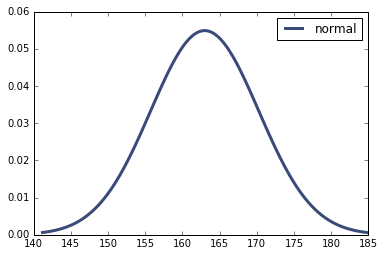

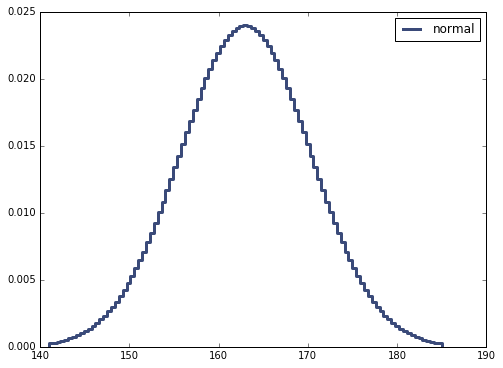

In [6]:
mean, var = 163, 52.8
std = math.sqrt(var)
pdf = thinkstats2.NormalPdf(mean, std)
pdf.Density(mean + std)
thinkplot.Pdf(pdf, label='normal')
thinkplot.Show()

pmf = pdf.MakePmf()
thinkplot.Pmf(pmf, label='normal')
thinkplot.Show()


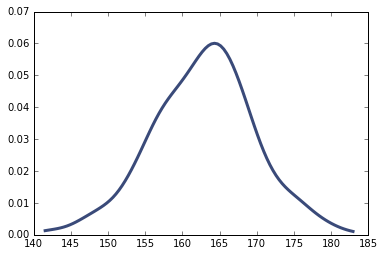

In [10]:
sample = [random.gauss(mean, std) for i in range(500)]
sample_pdf = thinkstats2.EstimatedPdf(sample)
thinkplot.Pdf(sample_pdf, label='sample KDE')

In [29]:
import density
import thinkstats2


df = brfss.ReadBrfss(nrows=None)
data = df.wtkg2.dropna()
data.head()


0     70.91
1     72.73
3     73.64
4     88.64
5    109.09
Name: wtkg2, dtype: float64

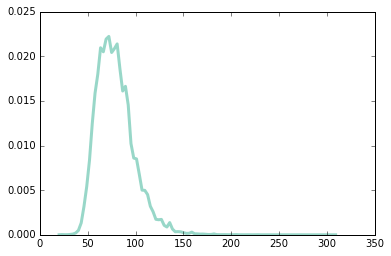

In [36]:
pdf = thinkstats2.EstimatedPdf(data)
thinkplot.Pdf(pdf, label='adult weight')


In [34]:
print(density.Summarize(data))

mean 78.99245299687198
std 19.546156913066667
median 77.27
skewness 1.05484001211
pearson skewness 0.264367338162
(78.99245299687198, 77.269999999999996)


### 6.1 Exercise

In [49]:
import numpy as np

import density
import hinc
import thinkplot
import thinkstats2

def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.log_lower[0] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.log_upper[41] = log_upper

    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, row.freq)
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

def main(log_upper=6.0):
    df = hinc.ReadData()
    log_sample = InterpolateSample(df, log_upper)

    log_cdf = thinkstats2.Cdf(log_sample)
    thinkplot.Cdf(log_cdf)
    thinkplot.Show(xlabel='household income',
                   ylabel='CDF')

    sample = np.power(10, log_sample)
    mean, median = density.Summarize(sample)

    cdf = thinkstats2.Cdf(sample)
    print('cdf[mean]', cdf[mean])

    pdf = thinkstats2.EstimatedPdf(sample)
    thinkplot.Pdf(pdf)
    thinkplot.Show(xlabel='household income',
                   ylabel='PDF')

/Users/robert/ds/metis/prework/ThinkStats2/code/hinc.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[0][0] -= 1
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.


with log-upper 6


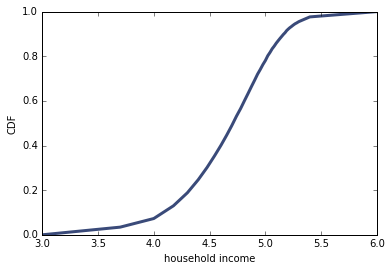

mean 74278.7075312
std 93946.9299635
median 51226.4544789
skewness 4.94992024443
pearson skewness 0.736125801914
cdf[mean] 0.660005879567


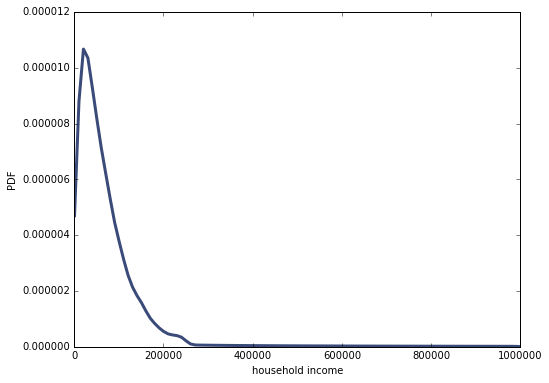

with log-upper 7


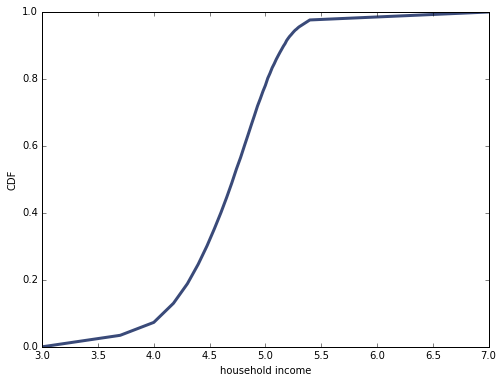

mean 124267.397222
std 559608.501374
median 51226.4544789
skewness 11.6036902675
pearson skewness 0.391564509277
cdf[mean] 0.856563066521


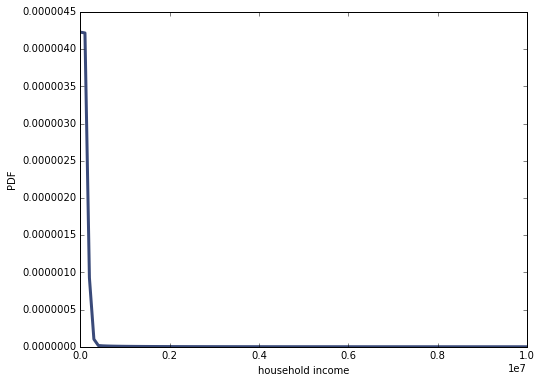

In [51]:
print("with log-upper 6")
main(6.0)
print("with log-upper 7")
main(7.0)